In [107]:
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope
#from pyemma import msm
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from mpl_toolkits.mplot3d import Axes3D
#from pyemma import msm

%matplotlib inline
#Script Pyeemma curl -s https://raw.githubusercontent.com/markovmodel/PyEMMA/devel/install_miniconda%2Bpyemma.sh | bash


#https://towardsdatascience.com/time-series-of-price-anomaly-detection-13586cd5ff46

#https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Time%20Series%20of%20Price%20Anomaly%20Detection%20Expedia.ipynb


In [91]:
expedia = pd.read_csv('/home/felipedev/Documentos/Docker/IOT/Data/Process Data/ProcessData.csv')

In [92]:
expedia.head()

,Date,Centro_de_Alto_Rendimiento,Puente_Aranda
0,01-01-2013 01:00,22.8,30.0
1,01-01-2013 02:00,40.8,52.8
2,01-01-2013 11:00,11.7,13.8
3,05-01-2013 05:00,26.2,47.0
4,11-02-2013 17:00,64.2,NaN


In [93]:
expedia.columns.values

array(['Date', 'Centro_de_Alto_Rendimiento', 'Puente_Aranda'],
      dtype=object)

In [94]:
expedia.shape

(61344, 3)

In [95]:
df = expedia

In [96]:
df

,Date,Centro_de_Alto_Rendimiento,Puente_Aranda
0,01-01-2013 01:00,22.8,30.0
1,01-01-2013 02:00,40.8,52.8
2,01-01-2013 11:00,11.7,13.8
3,05-01-2013 05:00,26.2,47.0
4,11-02-2013 17:00,64.2,NaN
...,...,...,...
61339,21-02-2014 12:00,26.5,43.2
61340,21-02-2014 13:00,32.7,30.2
61341,21-02-2014 14:00,26.3,36.7
61342,21-02-2014 15:00,28.5,38.8


In [97]:
df['Centro_de_Alto_Rendimiento'].describe()

count    54395.000000
mean        31.338838
std         23.809909
min          0.000000
25%         13.000000
50%         25.000000
75%         43.800000
max        343.000000
Name: Centro_de_Alto_Rendimiento, dtype: float64

In [98]:
df['Date'].describe()

count                61344
unique               61344
top       25-07-2018 06:00
freq                     1
Name: Date, dtype: object

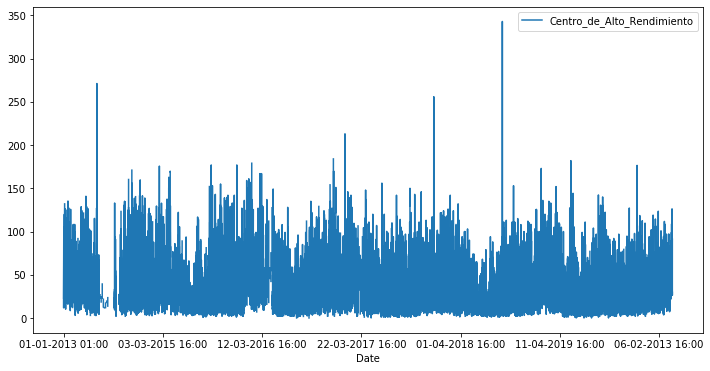

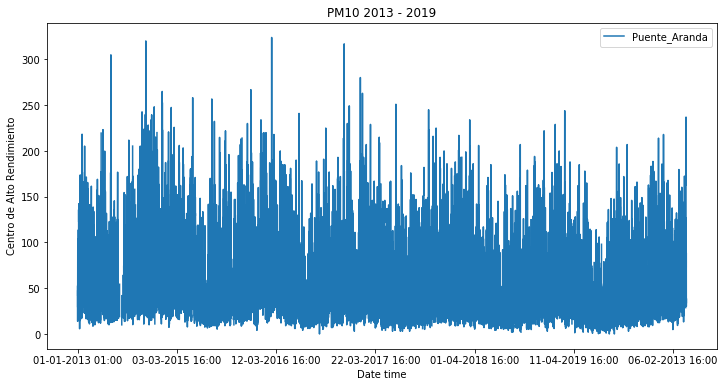

In [103]:
# plot the data
df.plot(x='Date', y='Centro_de_Alto_Rendimiento', figsize=(12,6))
df.plot(x='Date', y='Puente_Aranda', figsize=(12,6))
plt.xlabel('Date time')
plt.ylabel('Centro de Alto Rendimiento')
plt.title('PM10 2013 - 2019');



In [70]:
df.head()

,Date,Centro_de_Alto_Rendimiento,Puente Aranda
0,2013-01-01T01:00,22.8,30.0
1,2013-01-01T02:00,40.8,52.8
2,2013-01-01T11:00,11.7,13.8
3,2013-01-05T05:00,26.2,47.0
4,2013-02-11T17:00,64.2,NaN


In [106]:

data = df[['Centro_de_Alto_Rendimiento', 'Puente_Aranda']]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').